In [7]:
import cv2
import os
import subprocess
import matplotlib.pyplot as plt
print("Current working directory: ",os.getcwd())

Current working directory:  /content


In [8]:
cascade_url="https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
cascade_path="/content/haarcascade_file.xml"

In [9]:
if not os.path.exists(cascade_path):
  print(f"Downloading the Cascade File to {cascade_path}....")
  try:
    subprocess.run(['wget','-O',cascade_path,cascade_url],check=True)
    if not os.path.exists(cascade_path):
      raise FileNotFoundError("Error in downloading the cascade file")
  except:
    raise FileNotFoundError(f"Error in downloading the cascade file:{str(e)}")

In [13]:
image=cv2.imread("army.jpeg")
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [14]:
face_cascade=cv2.CascadeClassifier(cascade_path)
faces_found=face_cascade.detectMultiScale(image_gray,scaleFactor=1.05,minNeighbors=3,minSize=(10,10))

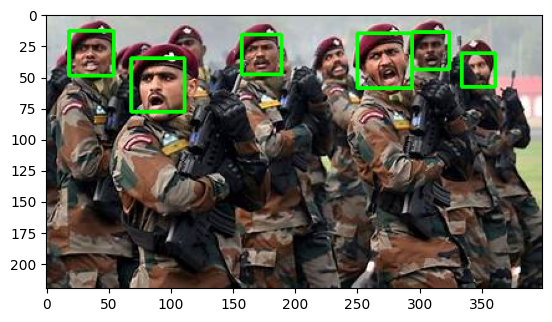

In [15]:
amount_found=len(faces_found)
if amount_found!=0:
  for (x,y,w,h) in faces_found:
    cv2.rectangle(image_rgb,(x,y),(x+w,y+h),(0,255,0),2)
  plt.imshow(image_rgb)
  plt.show()

In [36]:
img=cv2.imread('/content/Screenshot 2025-06-04 141538.png')
temp=cv2.imread('/content/Screenshot 2025-06-04 141550.png')
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
temp_gray=cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)

In [37]:
template_h,template_w=temp_gray.shape[:2]

In [38]:
result=cv2.matchTemplate(img_gray,temp_gray,cv2.TM_CCOEFF_NORMED)

In [39]:
threshold=0.8
nms=0.3

In [40]:
import numpy as np
locations=np.where(result>=threshold)
locations=list(zip(*locations[::-1]))
print(f"Initial number of matches:{len(locations)}")

Initial number of matches:1056


Number of matches after NMS:1


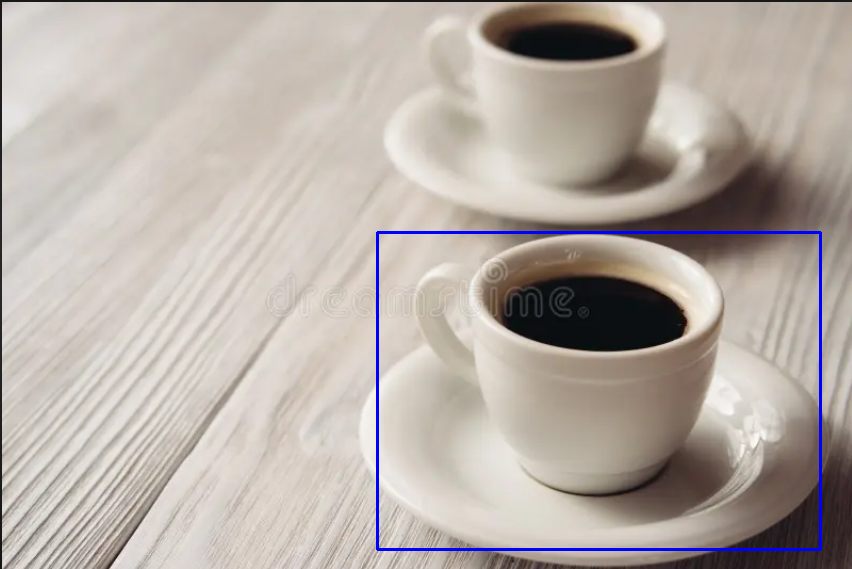

In [41]:
from google.colab.patches import cv2_imshow
if not locations:
  print("No matches found")
else:
  boxes=[]
  score=[]
  for loc in locations:
    x,y=loc
    boxes.append([x,y,x+template_w,y+template_h])
    score.append(result[y,x])
  boxes=np.array(boxes)
  score=np.array(score)
  indices=cv2.dnn.NMSBoxes(boxes.tolist(),score.tolist(),threshold,nms)
  print(f"Number of matches after NMS:{len(indices)}")
  if len(indices)>0:
    for i in indices:
      i=i[0] if isinstance(i,tuple) else i
      x,y,x2,y2=boxes[i]
      cv2.rectangle(img,(x,y),(x2,y2),(255,0,0),2)
  cv2_imshow(img)